In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [39]:
df = pd.read_csv("/content/application_train (1).csv")

In [40]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Total number of loan applications: 307,511


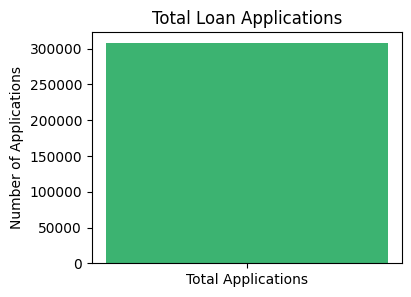

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
total_applications = df['SK_ID_CURR'].nunique()
print(f"Total number of loan applications: {total_applications:,}")
plt.figure(figsize=(4, 3))
plt.bar(['Total Applications'], [total_applications], color='mediumseagreen')
plt.title('Total Loan Applications')
plt.ylabel('Number of Applications')
plt.show()

Overall Default Rate: 8.07%


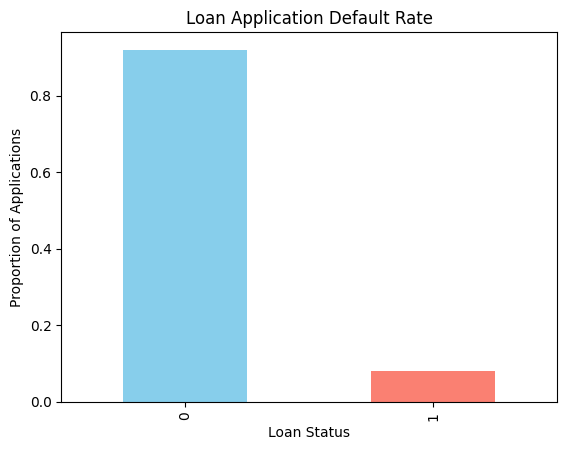

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


default_rate = df['TARGET'].mean()
print(f"Overall Default Rate: {default_rate:.2%}")
df['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Application Default Rate')
plt.ylabel('Proportion of Applications')
plt.xlabel('Loan Status')
plt.show()

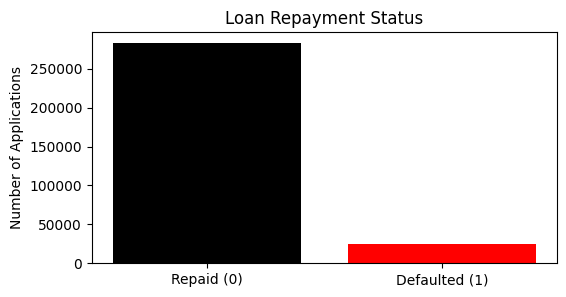

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


target_counts = df['TARGET'].value_counts().sort_index()
target_labels = ['Repaid (0)', 'Defaulted (1)']
plt.figure(figsize=(6, 3))
plt.bar(target_labels, target_counts, color=['black', 'red'])
plt.title('Loan Repayment Status')
plt.ylabel('Number of Applications')
plt.show()

Loan Type Distribution:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


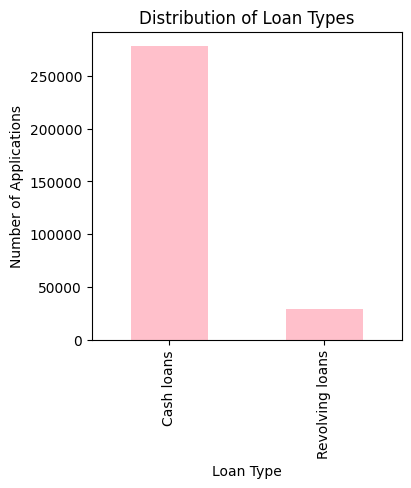

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

contract_counts = df['NAME_CONTRACT_TYPE'].value_counts()
print("Loan Type Distribution:")
print(contract_counts)
plt.figure(figsize=(4, 4))
contract_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Loan Types')
plt.ylabel('Number of Applications')
plt.xlabel('Loan Type')
plt.show()

Default Rates by Loan Type (%):
NAME_CONTRACT_TYPE
Revolving loans    5.48
Cash loans         8.35
Name: TARGET, dtype: float64


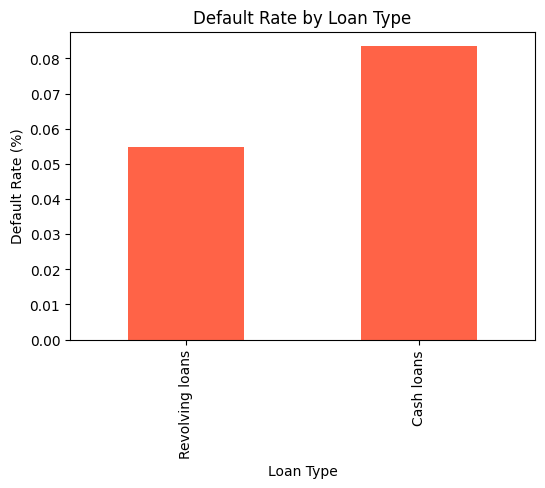

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

default_rates = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().sort_values()
print("Default Rates by Loan Type (%):")
print((default_rates * 100).round(2))
plt.figure(figsize=(6, 4))
default_rates.plot(kind='bar', color='tomato')
plt.title('Default Rate by Loan Type')
plt.ylabel('Default Rate (%)')
plt.xlabel('Loan Type')
plt.show()

Applicant Distribution by Gender:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


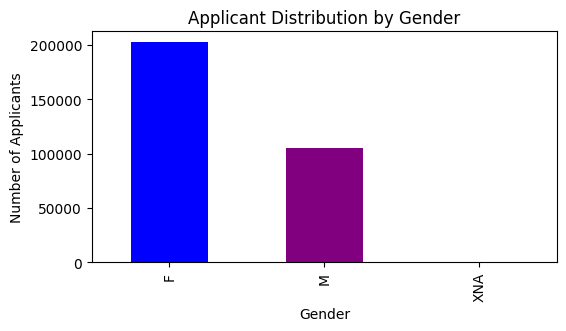

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['CODE_GENDER'].value_counts()
print("Applicant Distribution by Gender:")
print(gender_counts)
plt.figure(figsize=(6, 3))
gender_counts.plot(kind='bar', color=['blue', 'purple', 'black'])
plt.title('Applicant Distribution by Gender')
plt.ylabel('Number of Applicants')
plt.xlabel('Gender')
plt.show()

Default Rates by Gender (%):
CODE_GENDER
M      10.14
F       7.00
XNA     0.00
Name: TARGET, dtype: float64


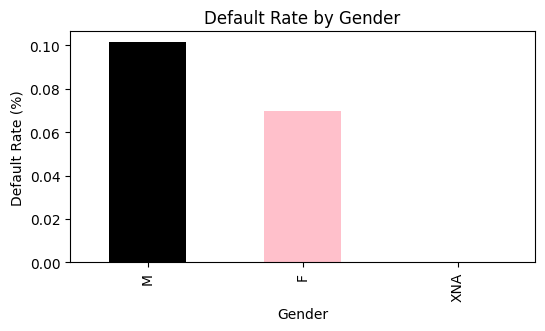

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

gender_default_rates = df.groupby('CODE_GENDER')['TARGET'].mean().sort_values(ascending=False)
print("Default Rates by Gender (%):")
print((gender_default_rates * 100).round(2))
plt.figure(figsize=(6,3))
gender_default_rates.plot(kind='bar', color=['black', 'pink', 'gray'])
plt.title('Default Rate by Gender')
plt.ylabel('Default Rate (%)')
plt.xlabel('Gender')
plt.show()

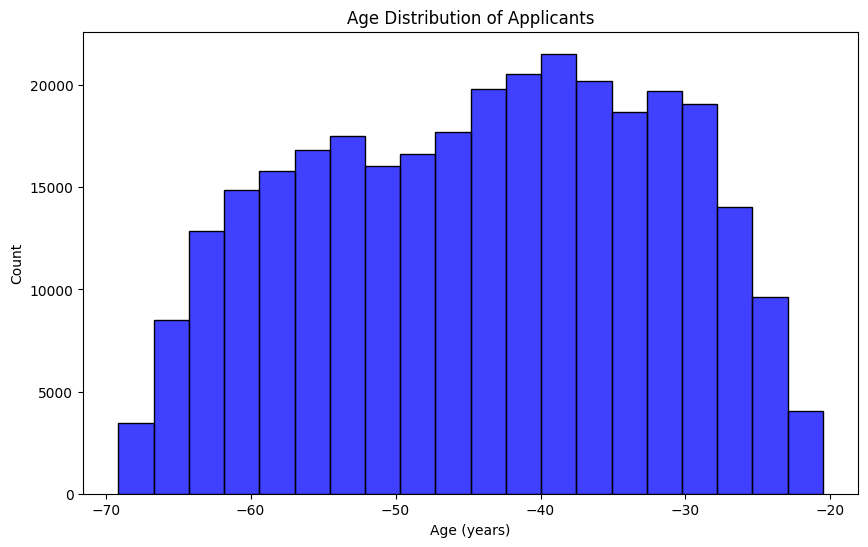

In [48]:
import seaborn as sns

df['AGE_YEARS'] = df['DAYS_BIRTH'] / 365


plt.figure(figsize=(10,6))
sns.histplot(df['AGE_YEARS'], bins=20, color='blue')
plt.title("Age Distribution of Applicants")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

Default Rate by Age Group (%):
AGE_GROUP
[20, 30)   NaN
[30, 40)   NaN
[40, 50)   NaN
[50, 60)   NaN
[60, 70)   NaN
Name: TARGET, dtype: float64


/tmp/ipython-input-49-545448110.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_rates = df.groupby('AGE_GROUP')['TARGET'].mean() * 100


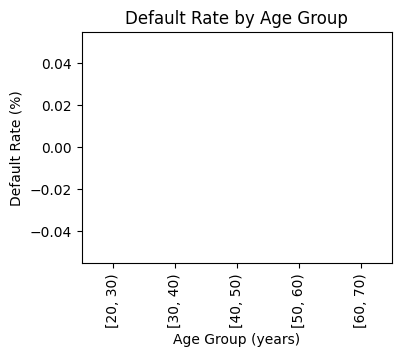

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df['AGE_YEARS'] = df['DAYS_BIRTH'] / 365

age_bins = [20, 30, 40, 50, 60, 70]
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=age_bins, right=False)


age_default_rates = df.groupby('AGE_GROUP')['TARGET'].mean() * 100


print("Default Rate by Age Group (%):")
print(age_default_rates.round())
plt.figure(figsize=(4, 3))
age_default_rates.plot(kind='bar', color='teal')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Default Rate (%)')
plt.show()

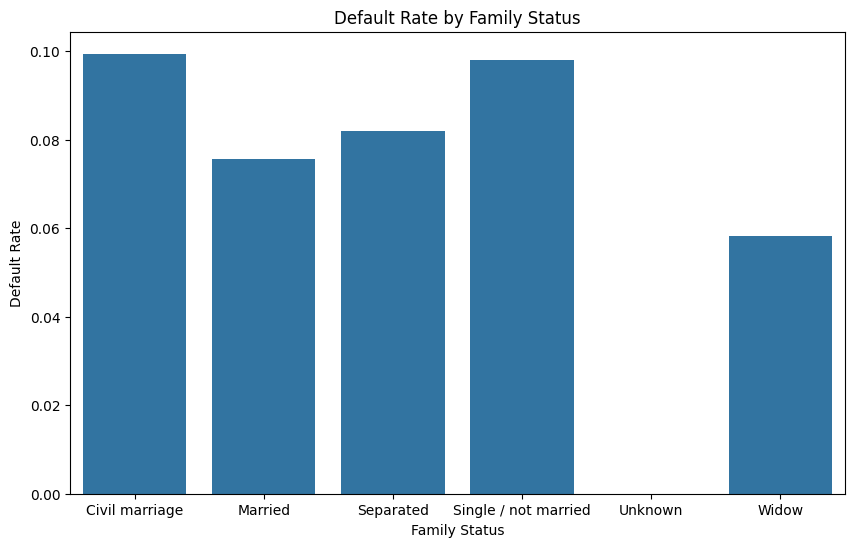

In [50]:
import seaborn as sns

default_rate_df = df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=default_rate_df, x='NAME_FAMILY_STATUS', y='TARGET')
plt.title("Default Rate by Family Status")
plt.ylabel("Default Rate")
plt.xlabel("Family Status")
plt.show()

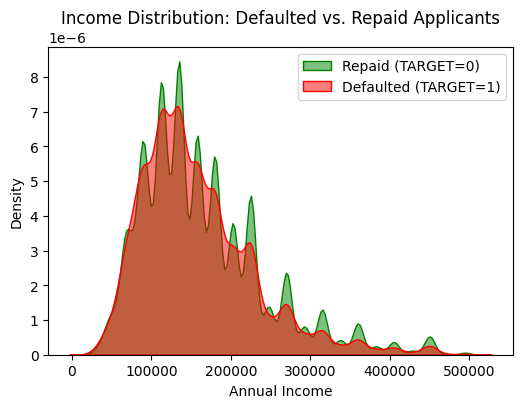

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_filtered = df[df['AMT_INCOME_TOTAL'] < 500000]

plt.figure(figsize=(6,4))
sns.kdeplot(data=df_filtered[df_filtered['TARGET'] == 0]['AMT_INCOME_TOTAL'],
            label='Repaid (TARGET=0)', color='green', fill=True, alpha=0.5)
sns.kdeplot(data=df_filtered[df_filtered['TARGET'] == 1]['AMT_INCOME_TOTAL'],
            label='Defaulted (TARGET=1)', color='red', fill=True, alpha=0.5)

plt.title('Income Distribution: Defaulted vs. Repaid Applicants')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.legend()
plt.show()

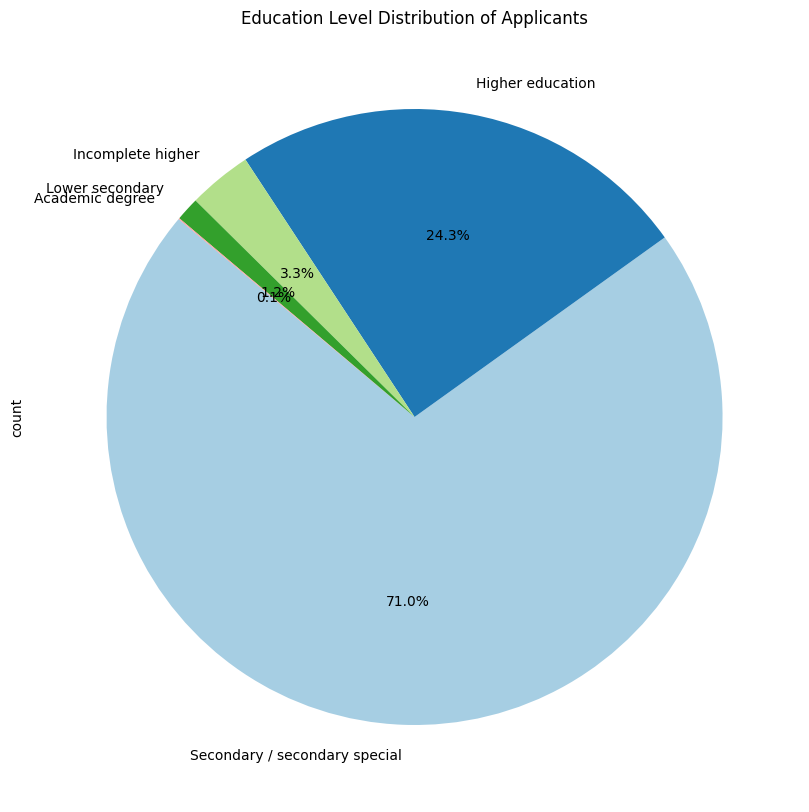

In [52]:
plt.figure(figsize=(10,10))
education_counts = df['NAME_EDUCATION_TYPE'].value_counts()
education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Education Level Distribution of Applicants")
plt.show()

Default Rate by Education Level (%):
NAME_EDUCATION_TYPE
Academic degree                  0.02
Higher education                 0.05
Incomplete higher                0.08
Secondary / secondary special    0.09
Lower secondary                  0.11
Name: TARGET, dtype: float64


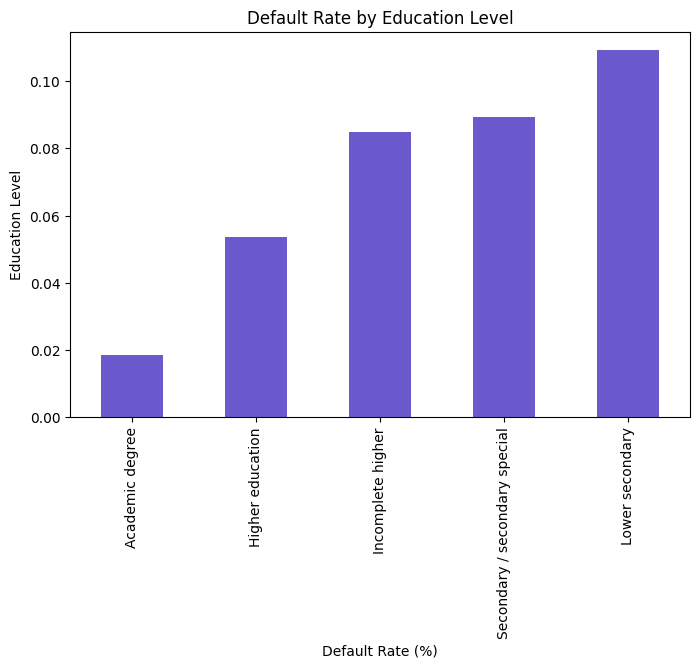

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

edu_default_rates = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values()

print("Default Rate by Education Level (%):")
print(edu_default_rates.round(2))

plt.figure(figsize=(8, 5))
edu_default_rates.plot(kind='bar', color='slateblue')
plt.title('Default Rate by Education Level')
plt.xlabel('Default Rate (%)')
plt.ylabel('Education Level')

plt.show()

/tmp/ipython-input-54-3799056090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='HAS_CHILDREN', y='TARGET', estimator='mean', palette=['lightblue', 'pink'])


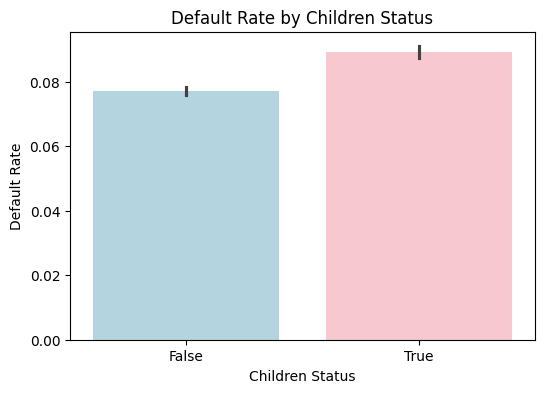

In [54]:
import seaborn as sns

df['HAS_CHILDREN'] = df['CNT_CHILDREN'] > 0


plt.figure(figsize=(6,4))
sns.barplot(data=df, x='HAS_CHILDREN', y='TARGET', estimator='mean', palette=['lightblue', 'pink'])
plt.title("Default Rate by Children Status")
plt.ylabel("Default Rate")
plt.xlabel("Children Status")
plt.show()


Default Rate by Car Ownership (%):
FLAG_OWN_CAR
Y    0.07
N    0.09
Name: TARGET, dtype: float64


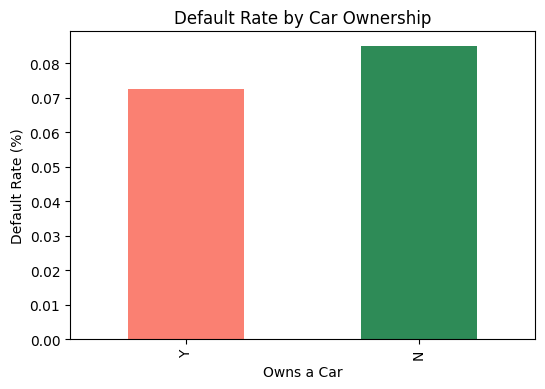

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

car_default_rate = df.groupby('FLAG_OWN_CAR')['TARGET'].mean().sort_values()

print("Default Rate by Car Ownership (%):")
print(car_default_rate.round(2))

plt.figure(figsize=(6, 4))
car_default_rate.plot(kind='bar', color=['salmon', 'seagreen'])
plt.title('Default Rate by Car Ownership')
plt.xlabel('Owns a Car')
plt.ylabel('Default Rate (%)')
plt.show()

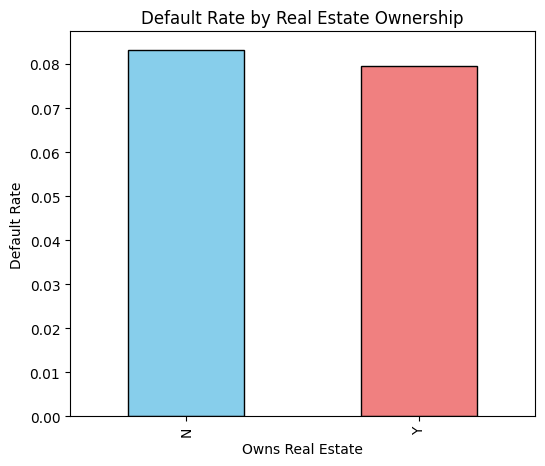

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


default_rate = df.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
plt.figure(figsize=(6,5))
default_rate.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title("Default Rate by Real Estate Ownership")
plt.ylabel("Default Rate")
plt.xlabel("Owns Real Estate")
plt.show()

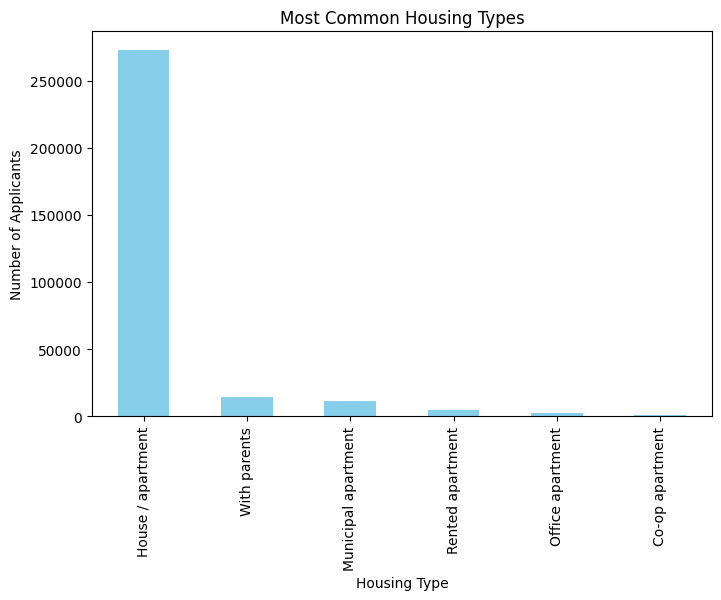

In [57]:
import matplotlib.pyplot as plt

housing_counts = df['NAME_HOUSING_TYPE'].value_counts()
plt.figure(figsize=(8, 5))
housing_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Housing Types')
plt.xlabel('Housing Type')
plt.ylabel('Number of Applicants')
plt.show()

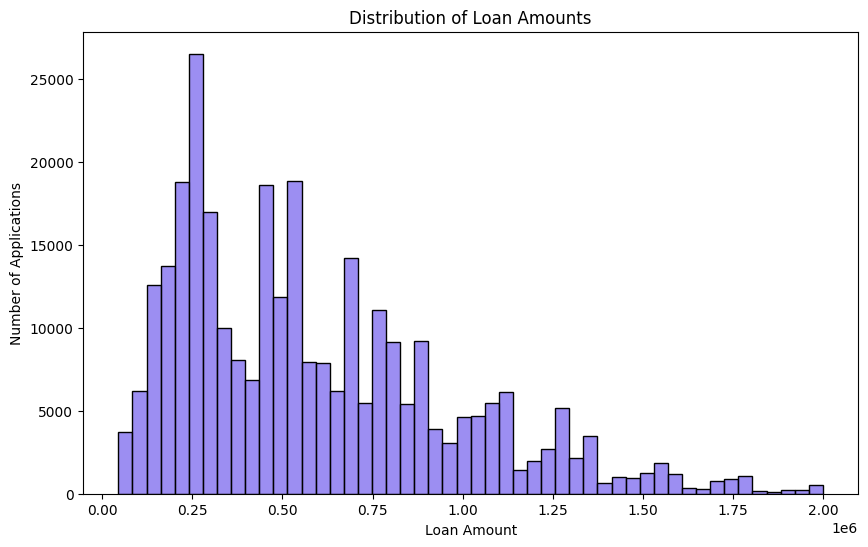

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


df_filtered = df[df['AMT_CREDIT'] < 2_000_000]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['AMT_CREDIT'], bins=50,  color='mediumslateblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Applications')
plt.show()

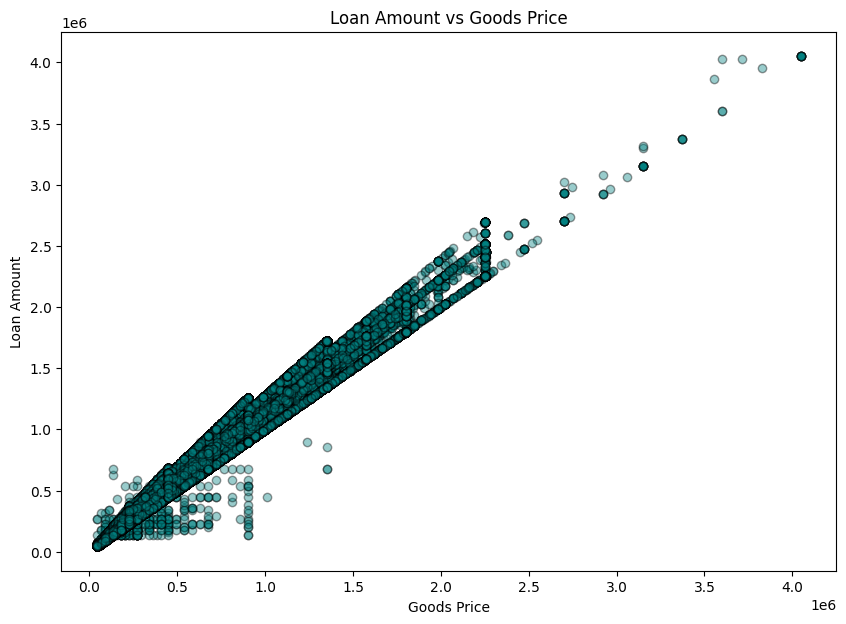

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean = df[['AMT_CREDIT', 'AMT_GOODS_PRICE']].dropna()
plt.figure(figsize=(10,7))
plt.scatter(df_clean['AMT_GOODS_PRICE'], df_clean['AMT_CREDIT'], alpha=0.4, color='teal', edgecolor='k')
plt.title("Loan Amount vs Goods Price")
plt.xlabel("Goods Price")
plt.ylabel("Loan Amount")
plt.show()

Most Common Income Types:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


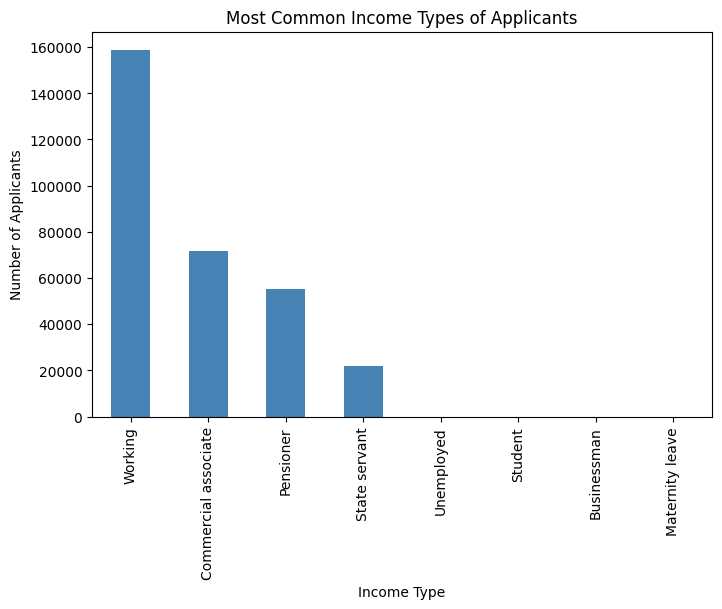

In [60]:
import matplotlib.pyplot as plt

income_type_counts = df['NAME_INCOME_TYPE'].value_counts()
print("Most Common Income Types:")
print(income_type_counts)
plt.figure(figsize=(8, 5))
income_type_counts.plot(kind='bar', color='steelblue')
plt.title('Most Common Income Types of Applicants')
plt.xlabel('Income Type')
plt.ylabel('Number of Applicants')
plt.show()

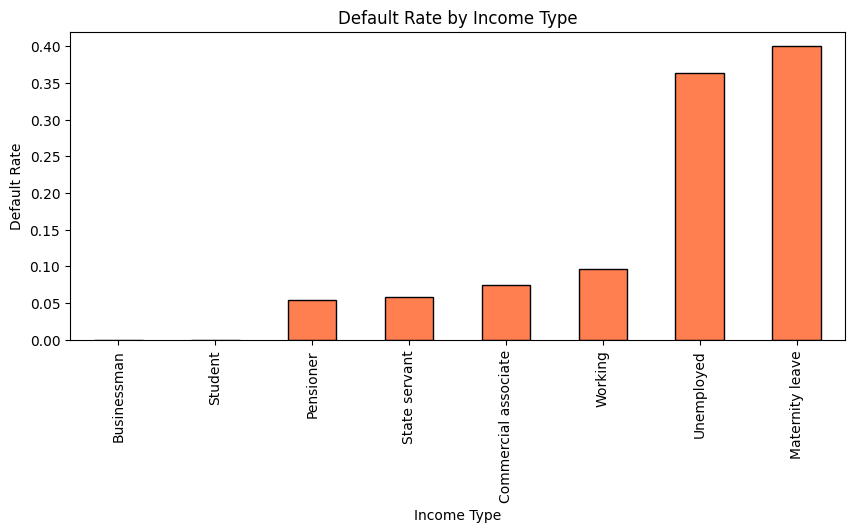

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

default_rate = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values()
plt.figure(figsize=(10,4))
default_rate.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Default Rate by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Default Rate")
plt.show()


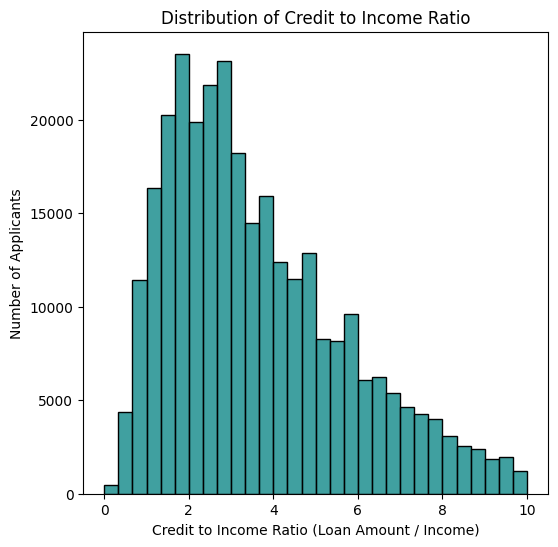

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

df['CIR'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

df_filtered = df[df['CIR'] < 10]

plt.figure(figsize=(6, 6))
sns.histplot(df_filtered['CIR'], bins=30, color='teal')
plt.title('Distribution of Credit to Income Ratio')
plt.xlabel('Credit to Income Ratio (Loan Amount / Income)')
plt.ylabel('Number of Applicants')
plt.show()

/tmp/ipython-input-63-4061756440.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_default = df.groupby('RATIO_BIN')['TARGET'].mean()


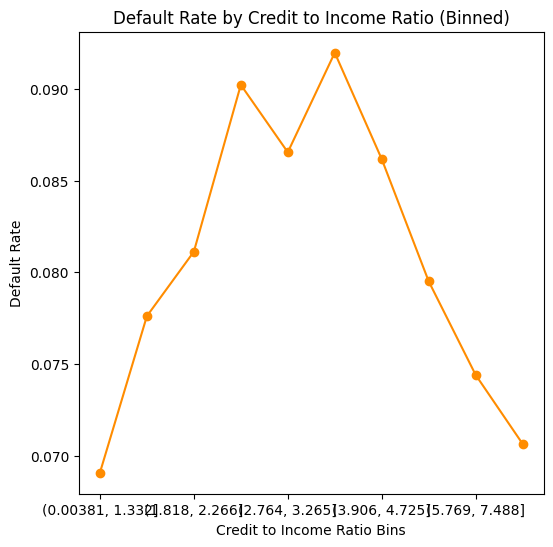

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


df['RATIO_BIN'] = pd.qcut(df['CREDIT_INCOME_RATIO'], q=10)

ratio_default = df.groupby('RATIO_BIN')['TARGET'].mean()
plt.figure(figsize=(6,6))
ratio_default.plot(kind='line', marker='o', color='darkorange')
plt.title("Default Rate by Credit to Income Ratio (Binned)")
plt.xlabel("Credit to Income Ratio Bins")
plt.ylabel("Default Rate")
plt.show()

/tmp/ipython-input-64-81327914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365


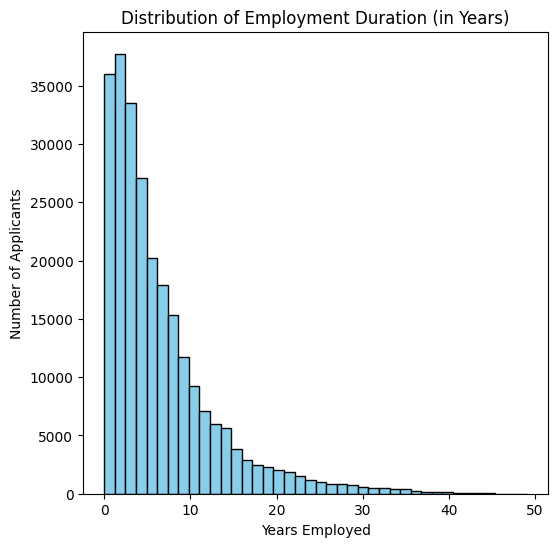

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


df_filtered = df[df['DAYS_EMPLOYED'] < 365243]

df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
plt.figure(figsize=(6,6))
plt.hist(df_filtered['YEARS_EMPLOYED'], bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Employment Duration (in Years)")
plt.xlabel("Years Employed")
plt.ylabel("Number of Applicants")
plt.show()

Default Rate by Employment Duration:
EMPLOYMENT_BIN
<1 yr        10.98
1–3 yrs      11.07
3–5 yrs       9.67
5–10 yrs      7.37
10–20 yrs     5.52
20+ yrs       4.19
Name: TARGET, dtype: float64


/tmp/ipython-input-65-2413739219.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_default_rate = df_filtered.groupby('EMPLOYMENT_BIN')['TARGET'].mean() * 100


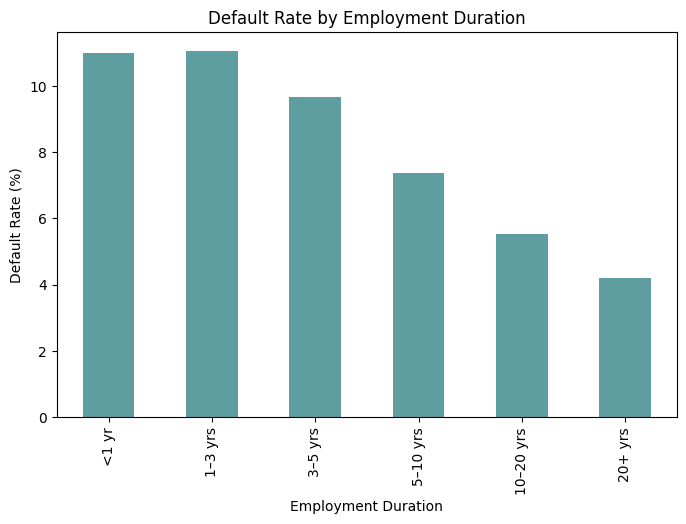

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df['EMPLOYMENT_YEARS'] = -df['DAYS_EMPLOYED'] / 365
df_filtered = df[df['EMPLOYMENT_YEARS'] < 100]

bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1 yr', '1–3 yrs', '3–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['EMPLOYMENT_YEARS'], bins=bins, labels=labels, right=False)
emp_default_rate = df_filtered.groupby('EMPLOYMENT_BIN')['TARGET'].mean() * 100
print("Default Rate by Employment Duration:")
print(emp_default_rate.round(2))
plt.figure(figsize=(8, 5))
emp_default_rate.plot(kind='bar', color='cadetblue')
plt.title('Default Rate by Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Default Rate (%)')
plt.show()

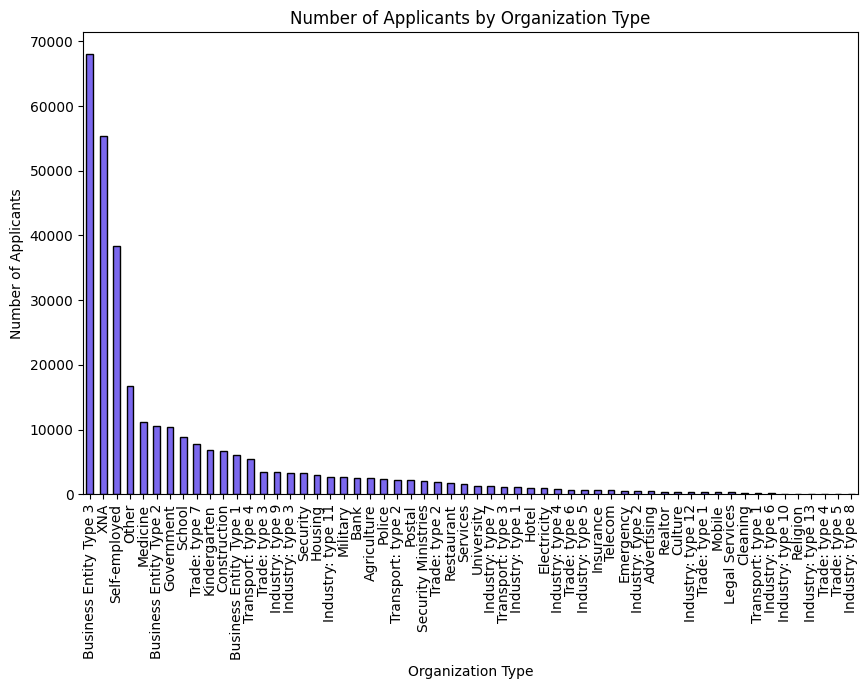

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

org_counts = df['ORGANIZATION_TYPE'].value_counts()


plt.figure(figsize=(10,6))
org_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')
plt.title("Number of Applicants by Organization Type")
plt.xlabel("Organization Type")
plt.ylabel("Number of Applicants")
plt.show()

Top 5 Organization Types by Default Rate:
ORGANIZATION_TYPE
Trade: type 4          3.12
Industry: type 12      3.79
Transport: type 1      4.48
Trade: type 6          4.60
Security Ministries    4.86
Name: TARGET, dtype: float64

Lowest 5 Organization Types by Default Rate:
ORGANIZATION_TYPE
Construction         11.68
Restaurant           11.71
Industry: type 8     12.50
Industry: type 13    13.43
Transport: type 3    15.75
Name: TARGET, dtype: float64


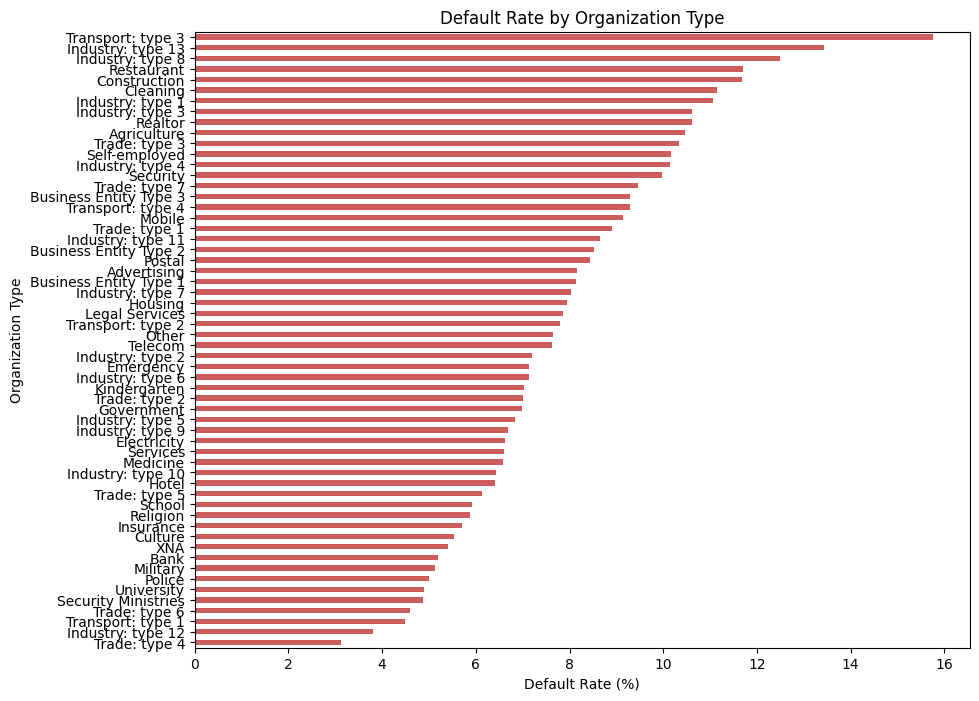

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

org_default_rates = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean() * 100
org_default_rates_sorted = org_default_rates.sort_values()

print("Top 5 Organization Types by Default Rate:")
print(org_default_rates_sorted.head().round(2))
print("\nLowest 5 Organization Types by Default Rate:")
print(org_default_rates_sorted.tail().round(2))

plt.figure(figsize=(10, 8))
org_default_rates_sorted.plot(kind='barh', color='indianred')
plt.title('Default Rate by Organization Type')
plt.xlabel('Default Rate (%)')
plt.ylabel('Organization Type')
plt.show()

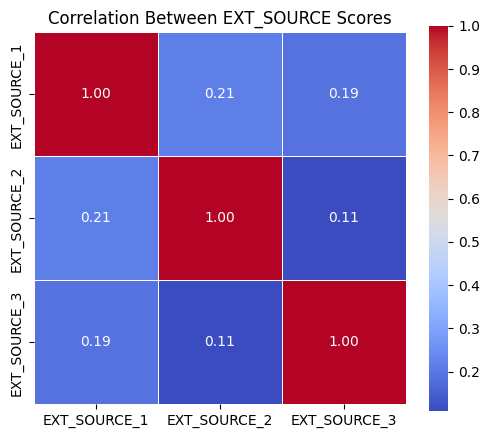

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
corr_matrix = ext_sources.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Between EXT_SOURCE Scores')
plt.show()

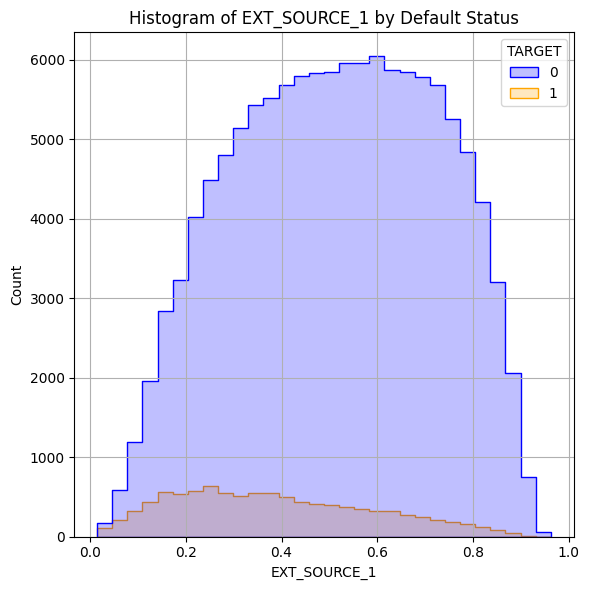

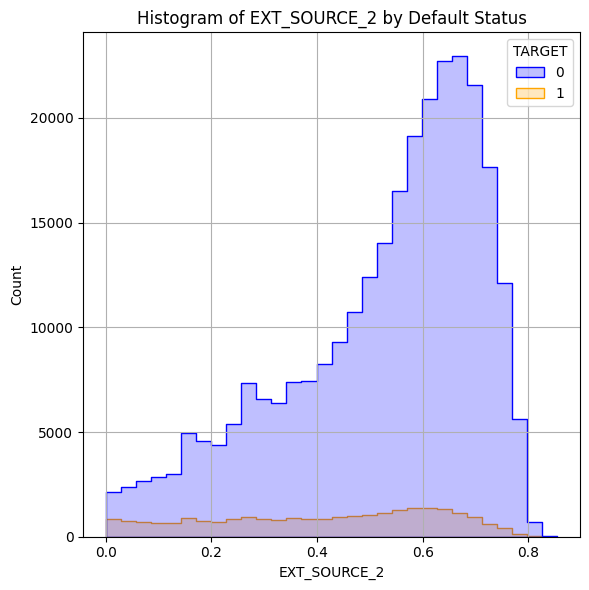

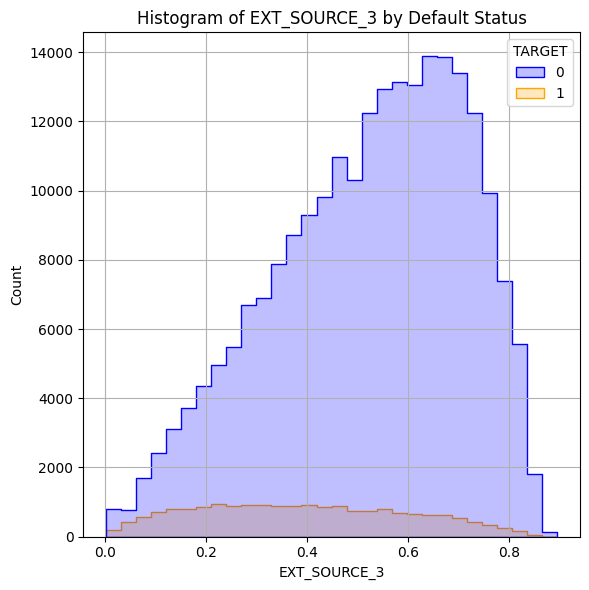

In [69]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    plt.figure(figsize=(6,6))
    sns.histplot(data=df_filtered, x=col, hue='TARGET', bins=30, palette={0: 'blue', 1: 'orange'}, element='step')
    plt.title(f"Histogram of {col} by Default Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

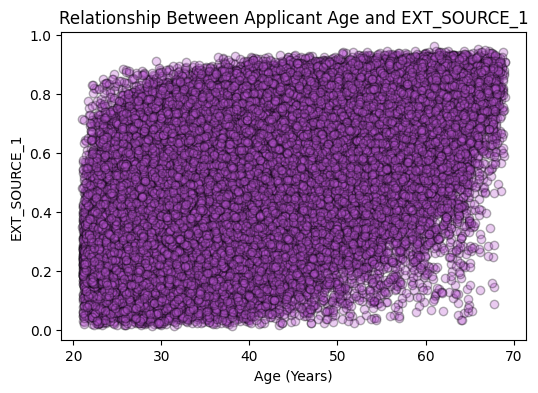

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


df['AGE'] = (-df['DAYS_BIRTH']) / 365

df_filtered = df[['AGE', 'EXT_SOURCE_1']].dropna()

plt.figure(figsize=(6,4))
plt.scatter(df_filtered['AGE'], df_filtered['EXT_SOURCE_1'], alpha=0.3, color='mediumorchid', edgecolor='k')
plt.title("Relationship Between Applicant Age and EXT_SOURCE_1")
plt.xlabel("Age (Years)")
plt.ylabel("EXT_SOURCE_1")
plt.show()

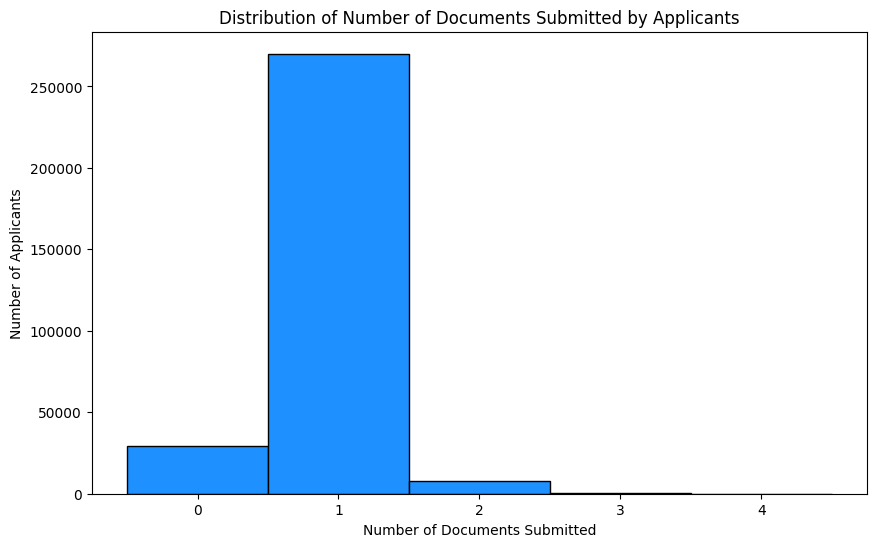

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

flag_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]

df['NUM_DOCUMENTS_SUBMITTED'] = df[flag_cols].sum(axis=1)

plt.figure(figsize=(10,6))
plt.hist(df['NUM_DOCUMENTS_SUBMITTED'], bins=range(0, df['NUM_DOCUMENTS_SUBMITTED'].max()+2),
         color='dodgerblue', edgecolor='black', align='left')
plt.title("Distribution of Number of Documents Submitted by Applicants")
plt.xlabel("Number of Documents Submitted")
plt.ylabel("Number of Applicants")
plt.show()





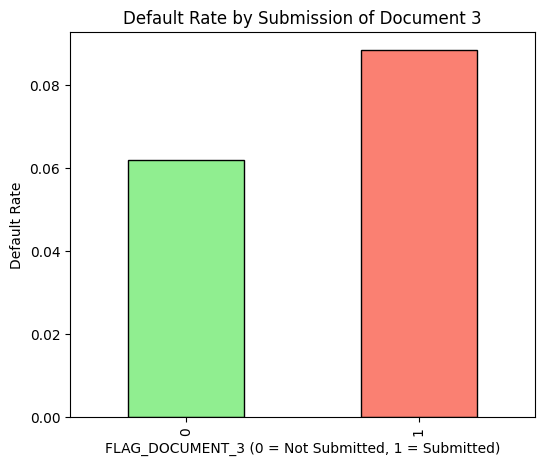

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

default_rate = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean()

plt.figure(figsize=(6,5))
default_rate.plot(kind='bar', color=['lightgreen', 'salmon'], edgecolor='black')
plt.title("Default Rate by Submission of Document 3")
plt.xlabel("FLAG_DOCUMENT_3 (0 = Not Submitted, 1 = Submitted)")
plt.ylabel("Default Rate")
plt.show()

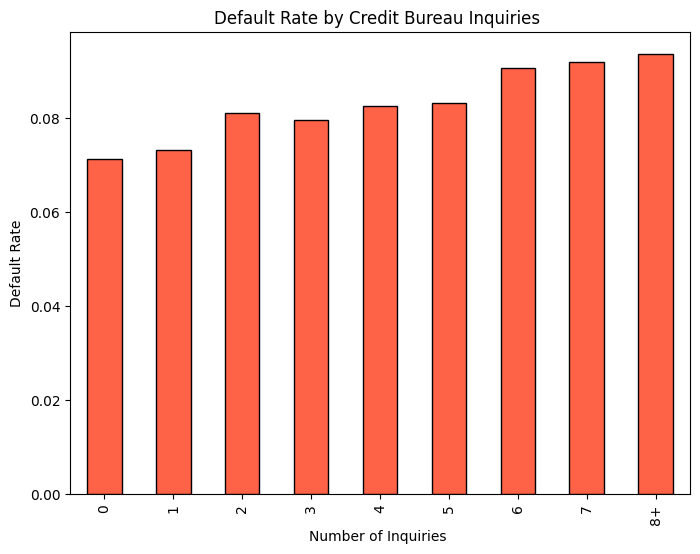

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[['AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']].dropna()


df_filtered['INQUIRIES_BIN'] = df_filtered['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(lambda x: str(int(x)) if x < 8 else '8+')

default_rate = df_filtered.groupby('INQUIRIES_BIN')['TARGET'].mean().sort_index()

plt.figure(figsize=(8,6))
default_rate.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Default Rate by Credit Bureau Inquiries ")
plt.xlabel("Number of Inquiries ")
plt.ylabel("Default Rate")
plt.show()